# Hands-on Activity 9.2 Customized Visualizations using Seaborn

**Name:** Moldez, Ericka Sheen C. <br>
**Section:** CPE22S3 <br>
**Submitted to:** Engr. Roman Richard

##  Instructions

* Create **a Python notebook** to answer all shown procedures, exercises and analysis in
 this section.

## Resources


* Download the following datasets: fb_stock_prices_2018.csv Download
 fb_stock_prices_2018.csv, earthquakes-1.csv 

## Procedures

* 9.4 Introduction to Seaborn<br>
* 9.5 Formatting Plots<br>
* 9.6 Customizing Visualizations

##   Introduction to Seaborn
##### About the Data
 In this notebook, we will be working with 2 datasets:
 * Facebook's stock price throughout 2018 (obtained using the stock_analysis package)
 * Earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US
 Geological Survey (USGS) using the USGS API)
<br>


In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('earthquakes-1.csv')


#### Categorical data
 A 7.5 magnitude earthquake on September 28, 2018 near Palu, Indonesia caused a
 devastating tsunami afterwards. Let's take a look at some visualizations to understand what
 magTypes are used in Indonesia, the range of magnitudes there, and how many of the
 earthquakes are accompanied by a tsunami.

In [68]:
quakes.assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms')
).set_index('time').loc['2018-09-28'].query(
    "parsed_place == 'Indonesia' and tsunami == 1 and mag == 7.5"
)


mag magType                      place  tsunami  \
time                                                                       
2018-09-28 10:02:43.480  7.5     mww  78km N of Palu, Indonesia        1   

                        parsed_place  
time                                  
2018-09-28 10:02:43.480    Indonesia

###### stripplot() <br>The stripplot() function helps us visualize categorical data on one axis and numerical data on the other. We also now have the option of coloring our points using a column of our data (with the hue parameter). Using a strip plot, we can see points for each earthquake that was measured with a given magType and what its magnitude was; however, it isn't too easy to see density of the points due to overlap:

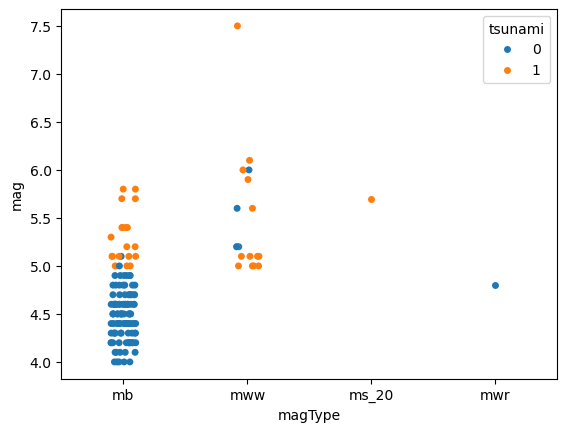

In [89]:
sns.stripplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"')
)
plt.show()

###### swarmplot()<br>The bee swarm plot helps address this issue be keeping the points from overlapping. Notice how many more points we can see for the blue section of the mb magType:

C:\Users\Kristel\sheen\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


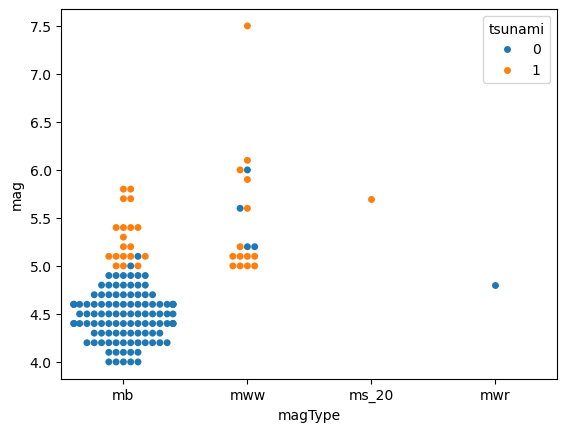

In [95]:
sns.swarmplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"')
)
plt.show()


 #### Correlation and Heatmaps
heatmap()<br>
An easier way to create correlation matrix is to use seaborn:

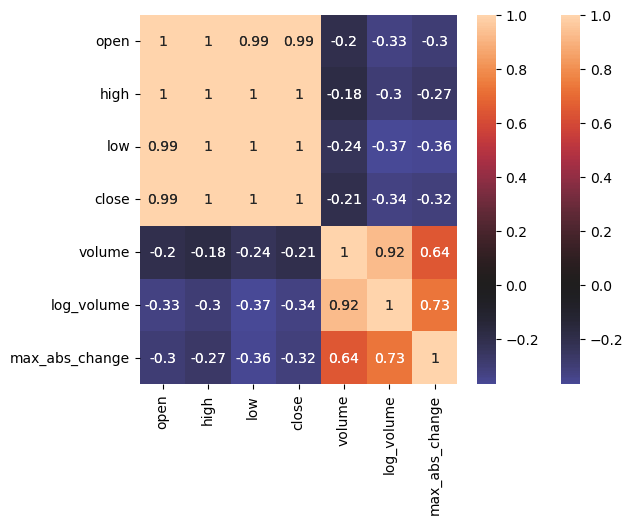

In [104]:
sns.heatmap(
    fb.sort_index().assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    ).corr(),
    annot=True, 
    center=0
)
plt.show()  

##### pairplot()
The pair plot is seaborn's answer to the scatter matrix we saw in the pandas subplotting notebook:

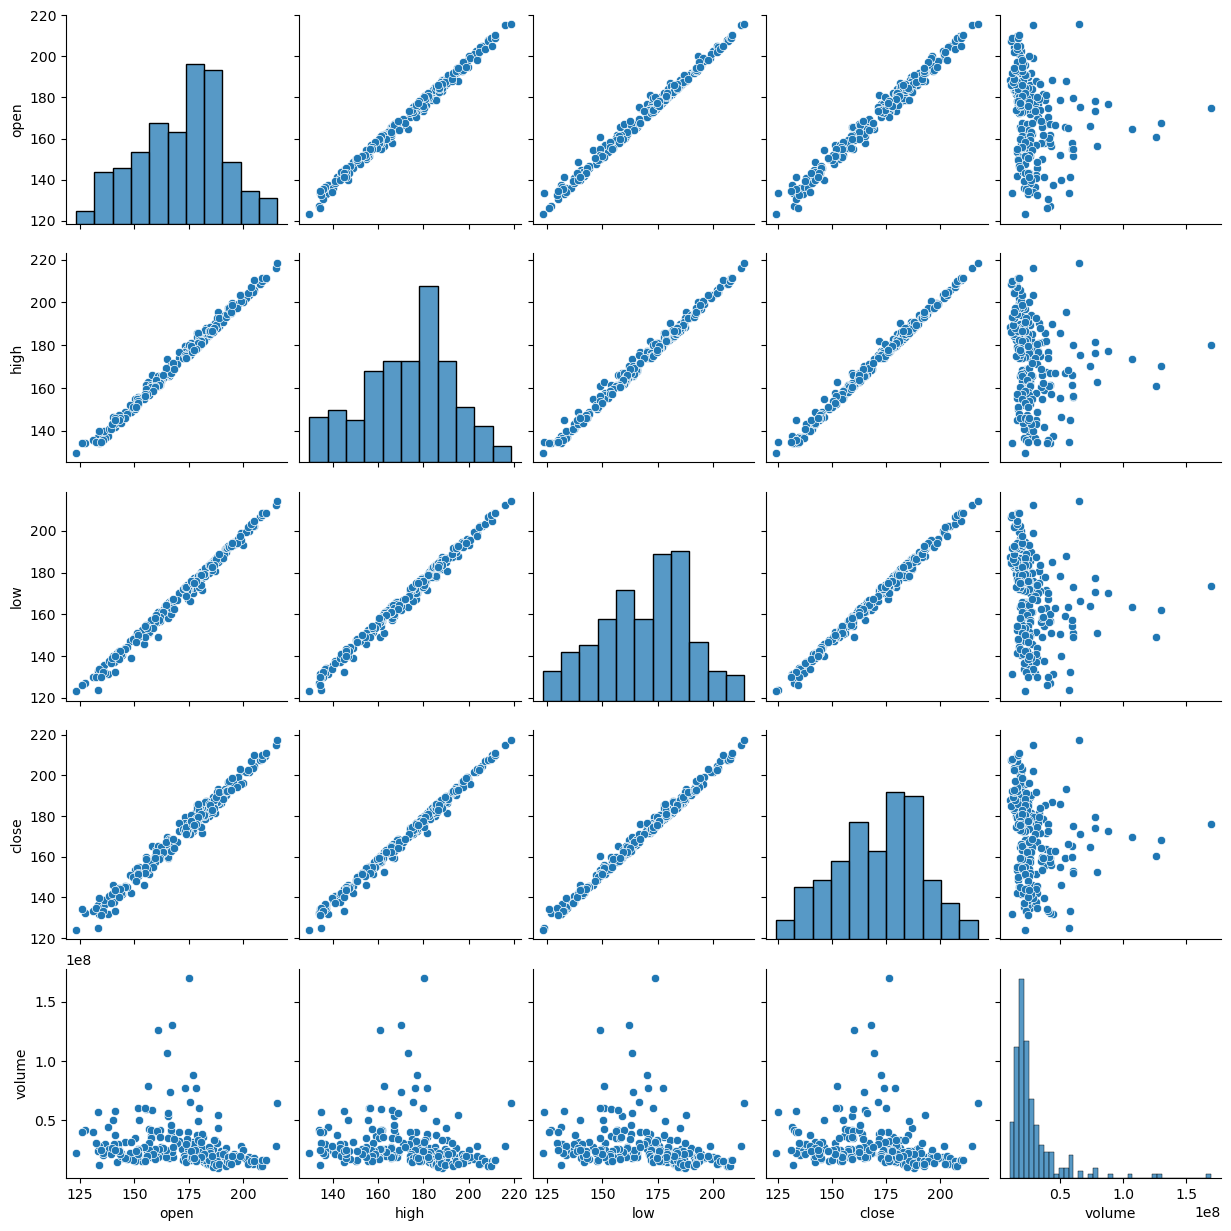

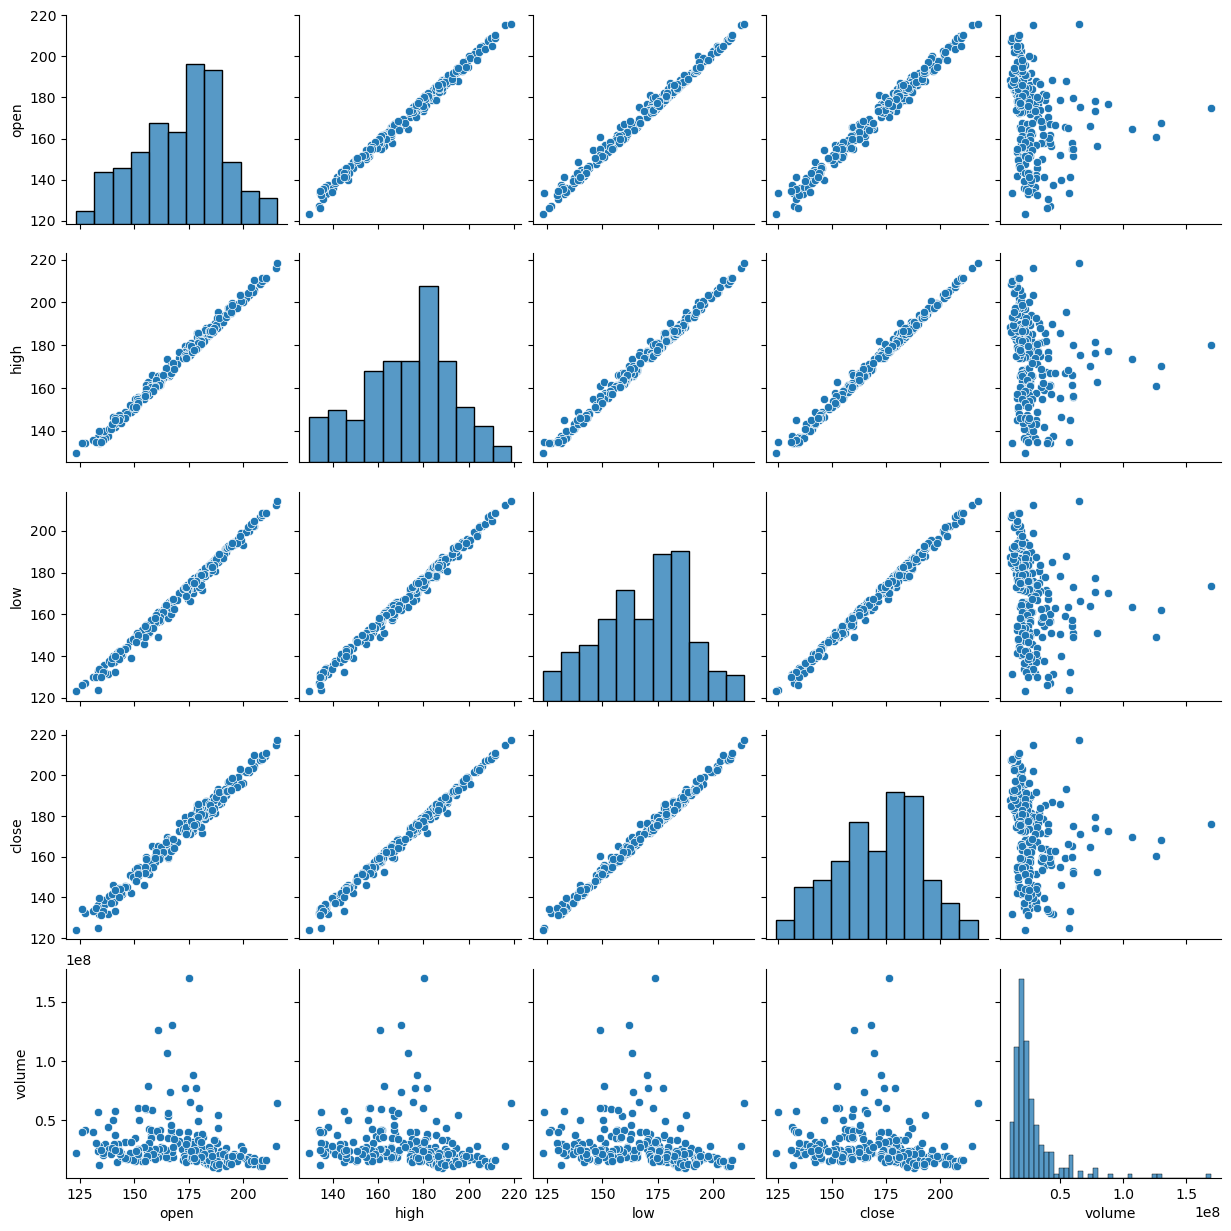

In [110]:
sns.pairplot(fb)
plt.show()

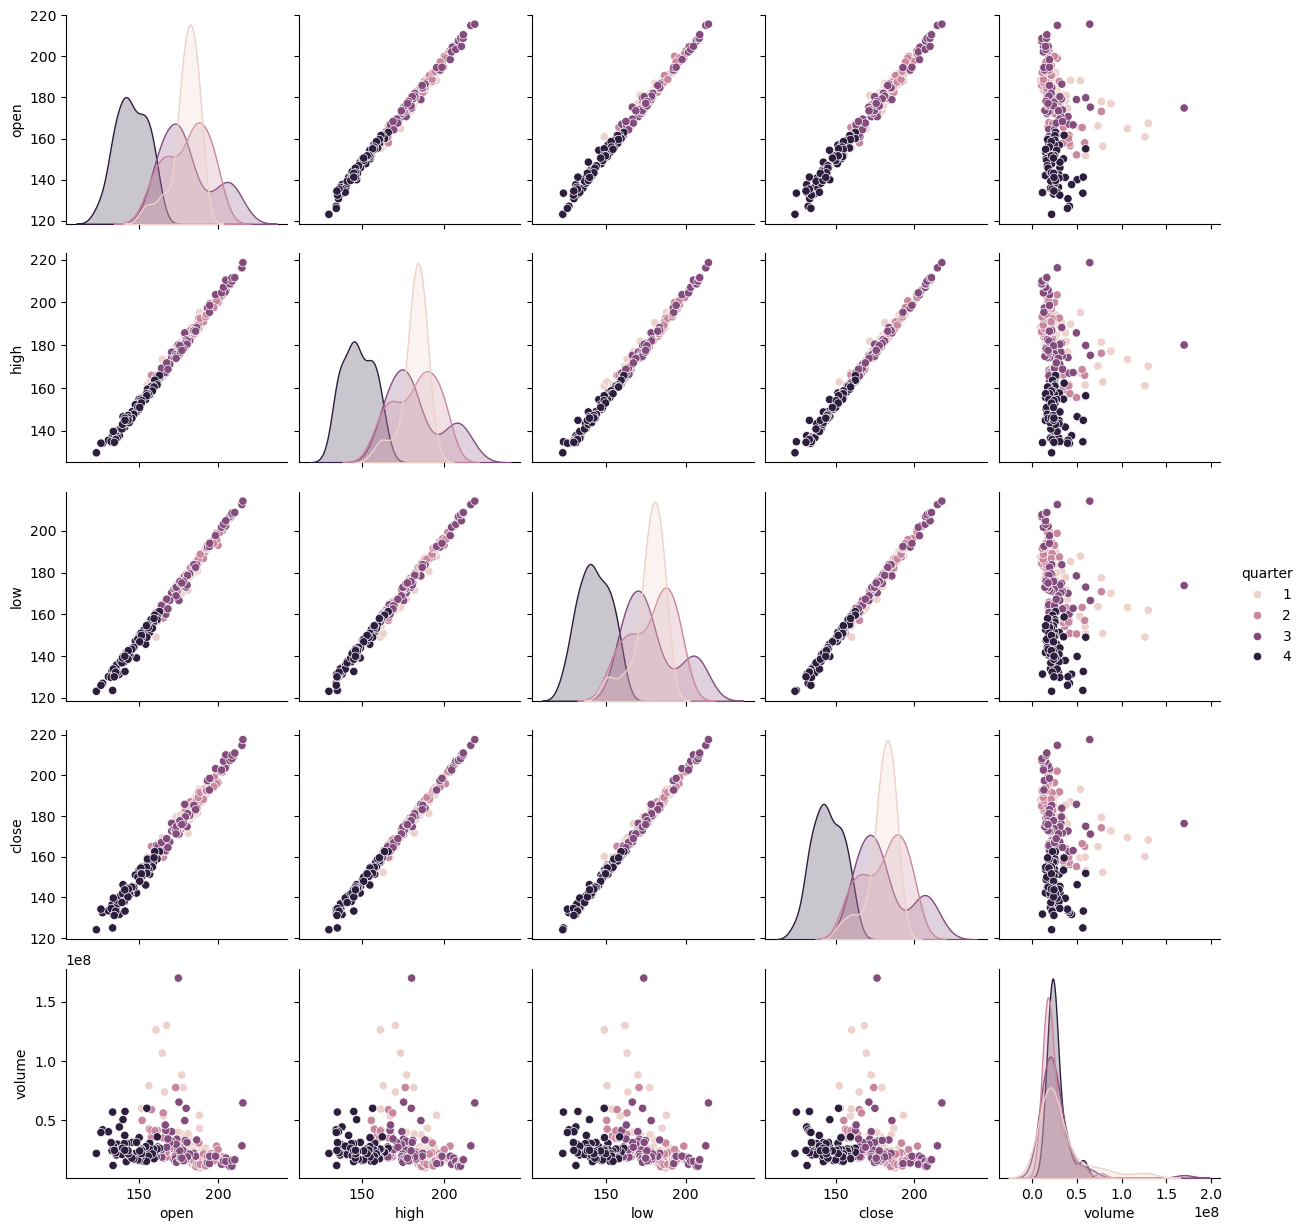

In [112]:
sns.pairplot(
 fb.assign(quarter=lambda x: x.index.quarter),
 diag_kind='kde',
 hue='quarter'
 )
plt.show()


jointplot()<br>
The joint plot allows us to visualize the relationship between two variables, like a scatter plot. However, we get the added benefit of being able to visualize their distributions at the same time (as a histogram or KDE). The default options give us a scatter plot in the center and histograms on the sides:

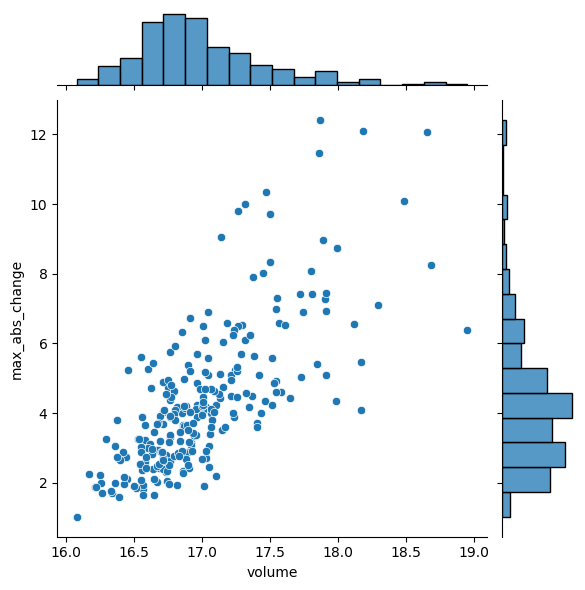

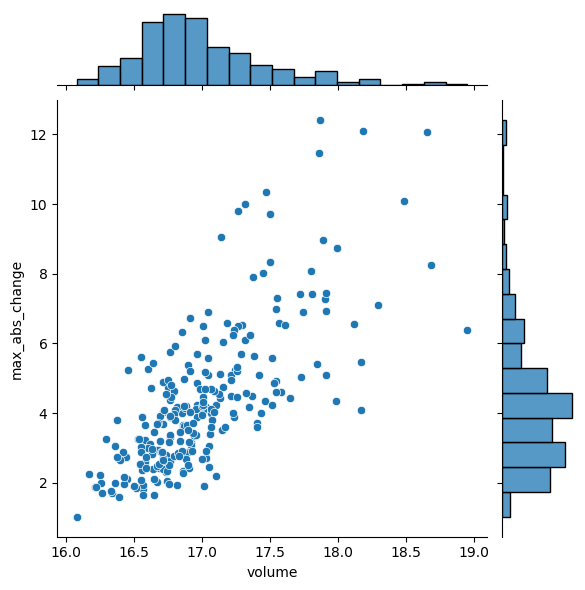

In [116]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
 )
plt.show()

 By changing the kind argument, we can change how the center of the plot is displayed. For
 example, we can pass kind='hex' for hexbins:

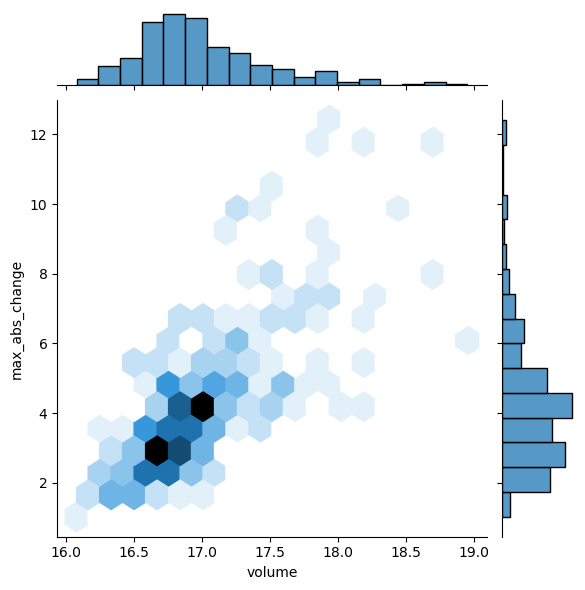

In [120]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='hex',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
 )
plt.show()

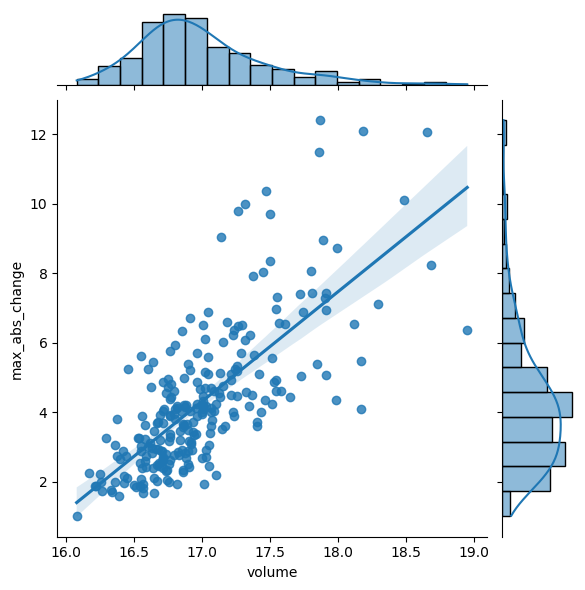

In [124]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='reg',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
 )
plt.show()

 If we pass kind='resid' , we get the residuals from the aforementioned regression

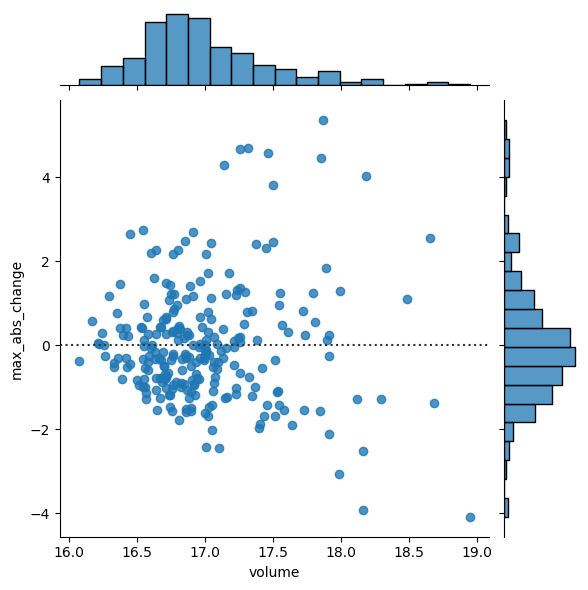

In [126]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='resid',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
 )
plt.show()

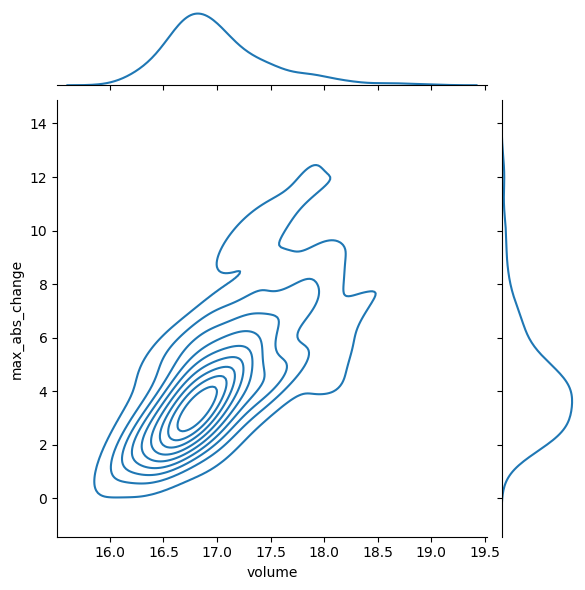

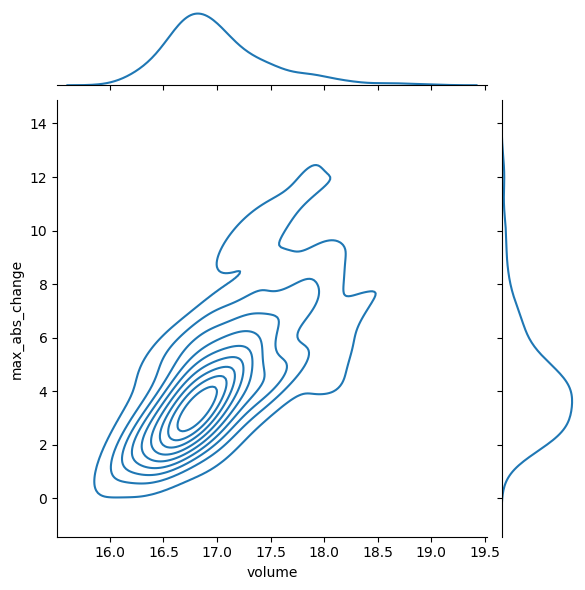

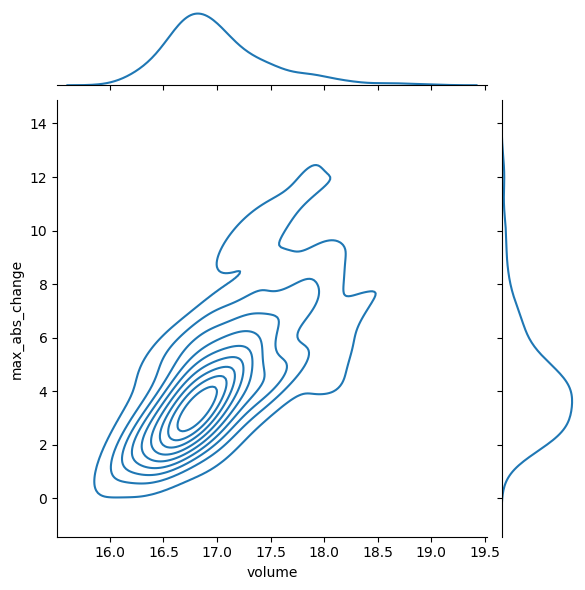

In [132]:
 sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='kde',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
 )
plt.show()


##### Regression plots <br>
We are going to use seaborn to visualize a linear regression between the log of the volume traded in Facebook stock and the maximum absolute daily change (daily high stock price-daily low stock price). To do so, we first need to isolate this data:

In [134]:
 fb_reg_data = fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 ).iloc[:,-2:]

Since we want to visualize each column as the regressor, we need to look at permutations of
their order. Permutations and combinations (among other things) are made easy in Python
with itertools , so let's import it

In [136]:
 import itertools

 itertools gives us efficient iterators. Iterators are objects that we loop over, exhausting them.
 This is an iterator from itertools ; notice how the second loop doesn't do anything:

In [142]:
iterator = itertools.repeat("I'm an iterator", 1)
for i in iterator:
 print(f'-->{i}')
print('This printed once because the iterator has been exhausted')
for i in iterator:
 print(f'-->{i}')

-->I'm an iterator
This printed once because the iterator has been exhausted


In [144]:
iterable = list(itertools.repeat("I'm an iterable", 1))
for i in iterable:
 print(f'-->{i}')
print('This prints again because it\'s an iterable:')
for i in iterable:
 print(f'-->{i}')

-->I'm an iterable
This prints again because it's an iterable:
-->I'm an iterable


The reg_resid_plots() function from the reg_resid_plot.py module in this folder uses regplot()
and residplot() from seaborn along with itertools to plot the regression and residuals side
by-side:

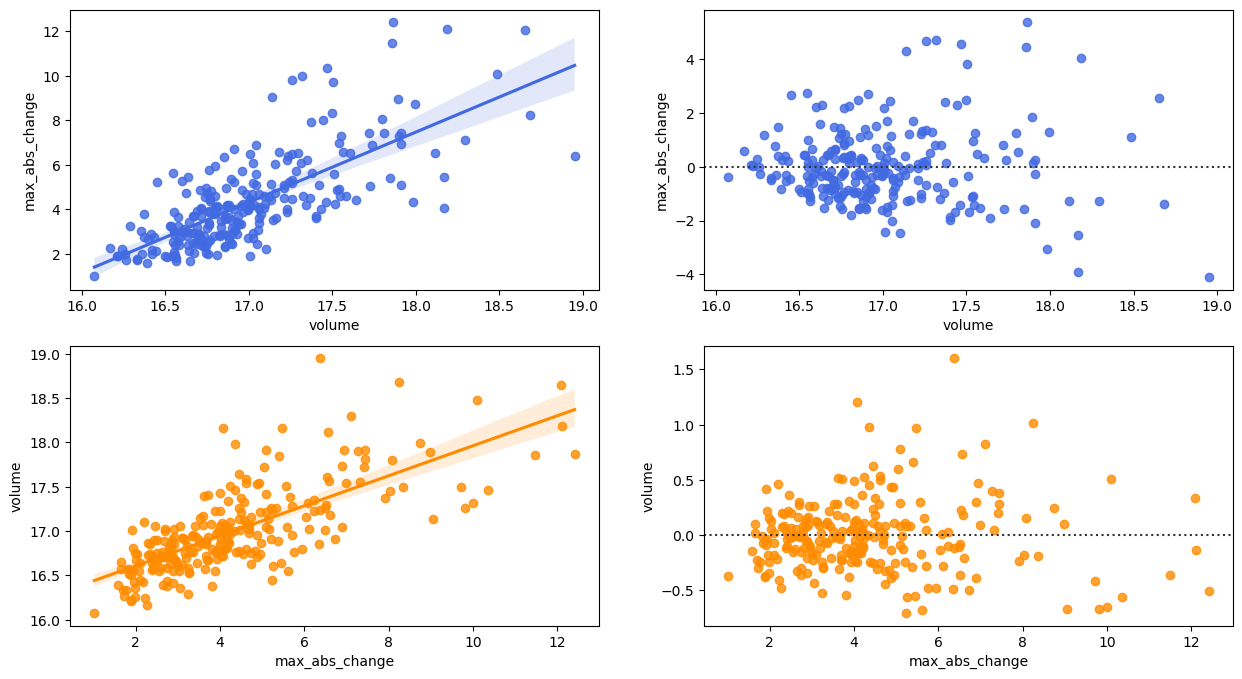

In [153]:
from reg_resid_plot import reg_resid_plots
reg_resid_plots(fb_reg_data)

 We can use lmplot() to split our regression across subsets of our data. For example, we can
 perform a regression per quarter on the Facebook stock data:

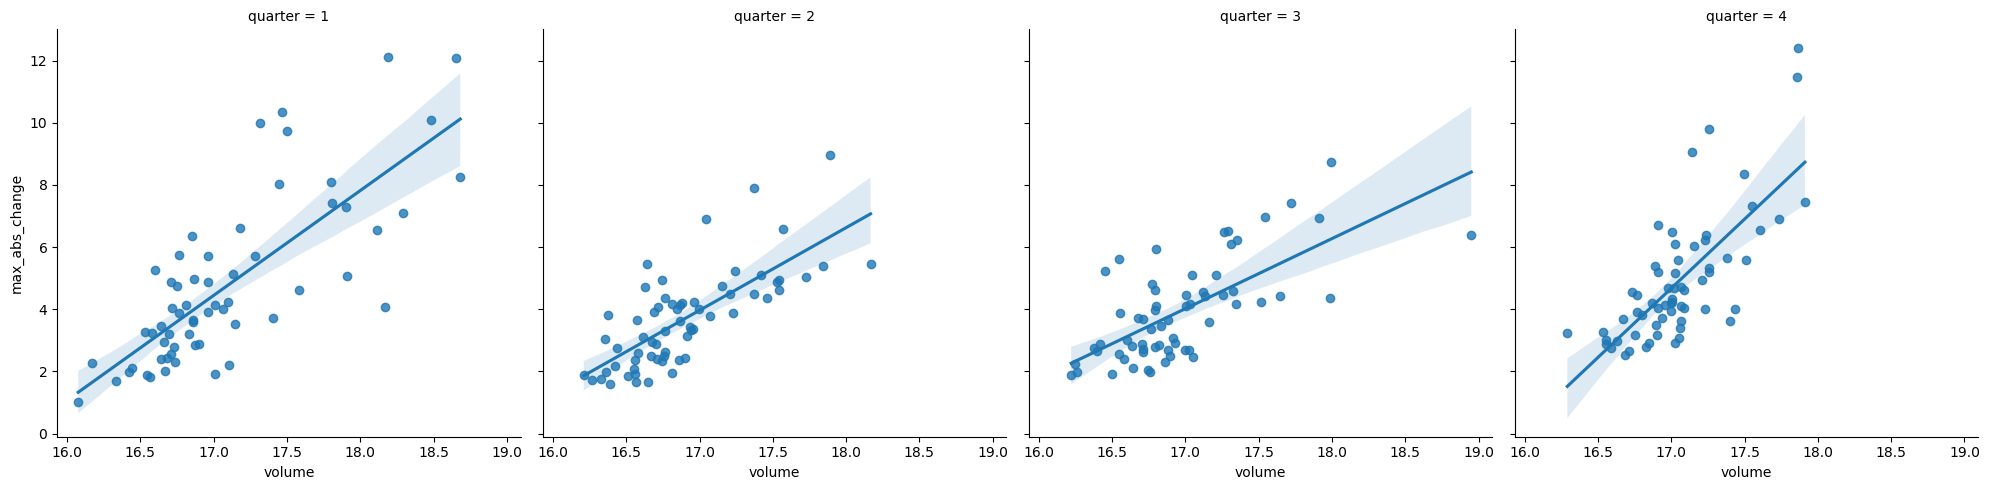

In [179]:
sns.lmplot(
    x='volume',
    y='max_abs_change',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low,
        quarter=lambda x: x.index.quarter
    ),
    col='quarter'
)
plt.show() 

 ###### Distributions
 Seaborn provides some new plot types for visualizing distributions in additional to its own
 versions of the plot types we discussed in chapter 5 (in this notebook).

### Boxenplot() <br>
The boxenplot is a box plot that shows additional quantiles:

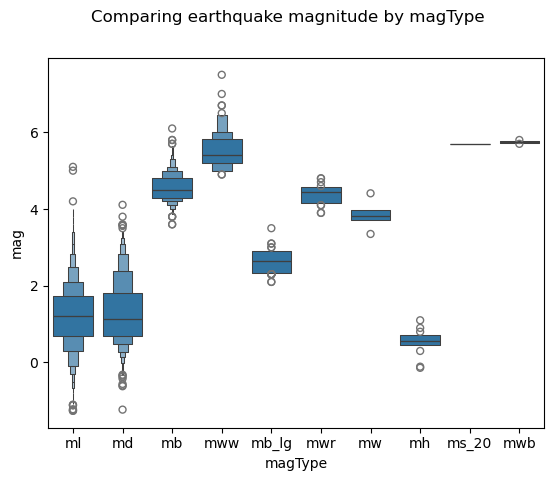

In [165]:
sns.boxenplot(
 x='magType', y='mag', data=quakes[['magType', 'mag']]
 )
plt.suptitle('Comparing earthquake magnitude by magType')
plt.show()

###### Violinplot()
Box plots lose some information about the distribution, so we can use violin plots which combine box plots and KDEs:

C:\Users\Kristel\AppData\Local\Temp\ipykernel_31204\3408134651.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


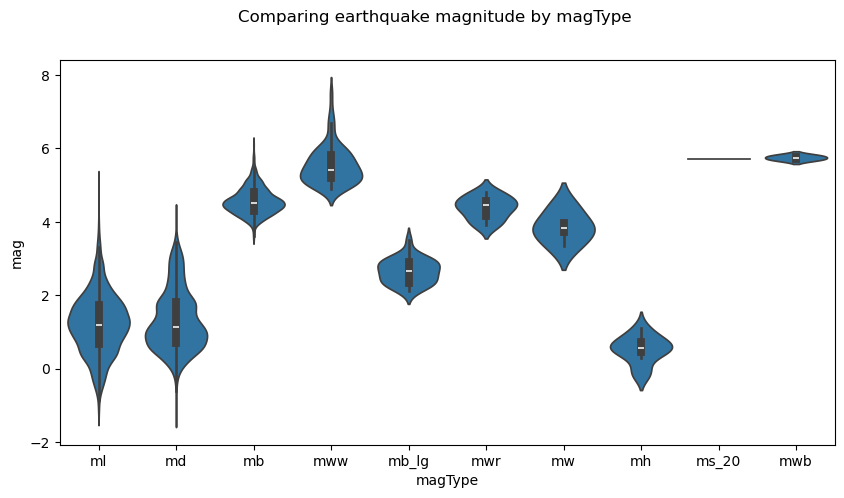

In [177]:
fig, axes = plt.subplots(figsize=(10, 5))

sns.violinplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']],
    ax=axes, scale='width'  # all violins have same width
)

plt.suptitle('Comparing earthquake magnitude by magType')

# Show the plot
plt.show()


###### Faceting
 We can create subplots across subsets of our data by faceting. First, we create a FacetGrid
 specifying how to layout the plots (which categorical column goes along the rows and which
 one along the columns). Then, we call the map() method of the FacetGrid and pass in the
 plotting function we want to use (along with any additional arguments).
 Let's make histograms showing the distribution of earthquake magnitude in California,
 Alaska, and Hawaii faceted by magType and parse_placed :

#### Formatting Plots
 ###### About the Data
 In this notebook, we will be working with Facebook's stock price throughout 2018 (obtained
 using the stock_analysis package).

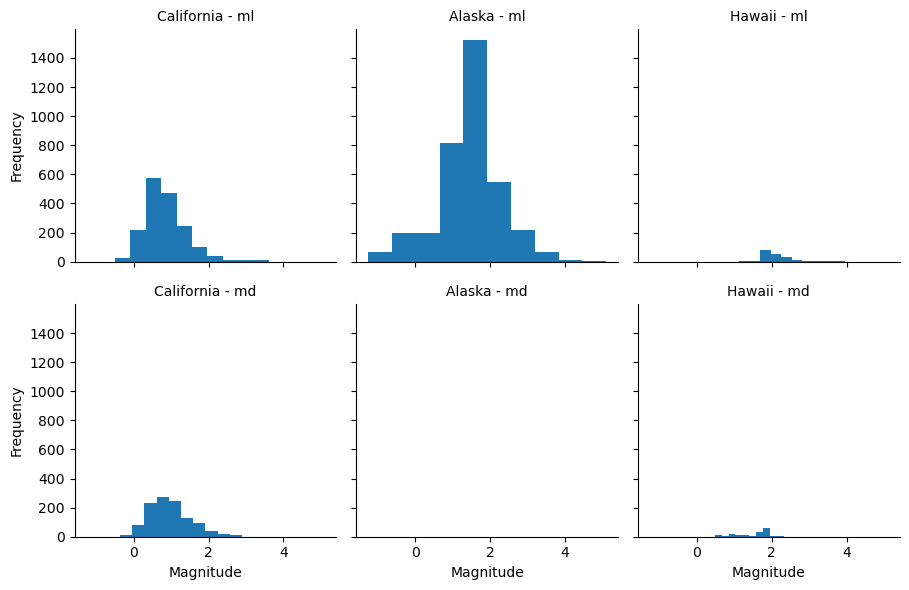

In [175]:
g = sns.FacetGrid(
    quakes[
        (quakes.parsed_place.isin(['California', 'Alaska', 'Hawaii'])) &
        (quakes.magType.isin(['ml', 'md']))
    ],
    row='magType',
    col='parsed_place'
)

g = g.map(plt.hist, 'mag')

g.set_axis_labels('Magnitude', 'Frequency')
g.set_titles('{col_name} - {row_name}')

plt.show()


In [190]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

### Titles and Axis Labels
* plt.suptitle() adds a title to plots and subplots
* plt.title() adds a title to a single plot. Note if you use subplots, it will only - put the title
 on the last subplot, so you will need to use plt.suptitle()
* plt.xlabel() labels the x-axis
* plt.ylabel() labels the y-axis

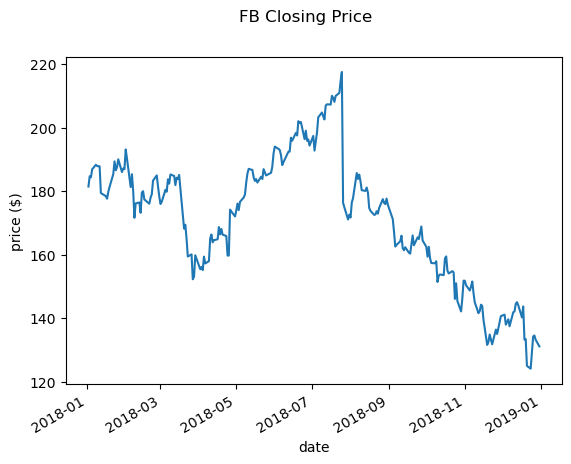

In [192]:
fb.close.plot()
plt.suptitle('FB Closing Price')
plt.xlabel('date')
plt.ylabel('price ($)')
plt.show()

### plt.suptitle() vs. plt.title()
 Check out what happens when we call plt.title() with subplots:

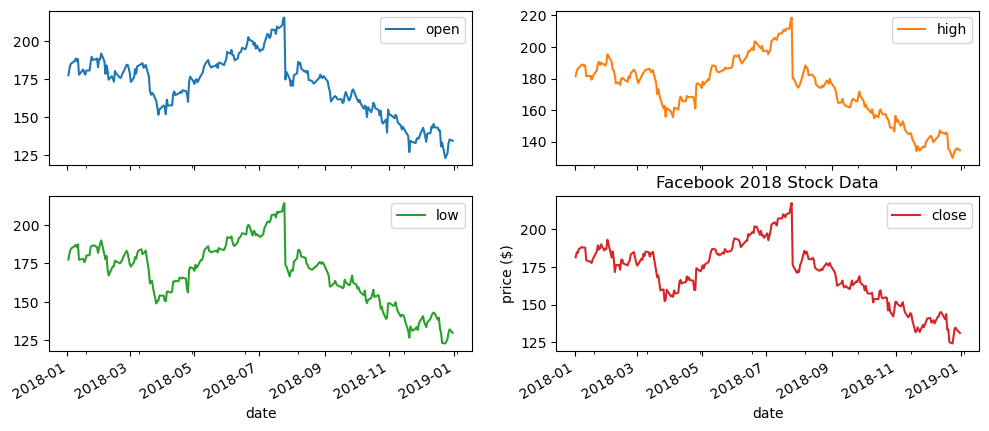

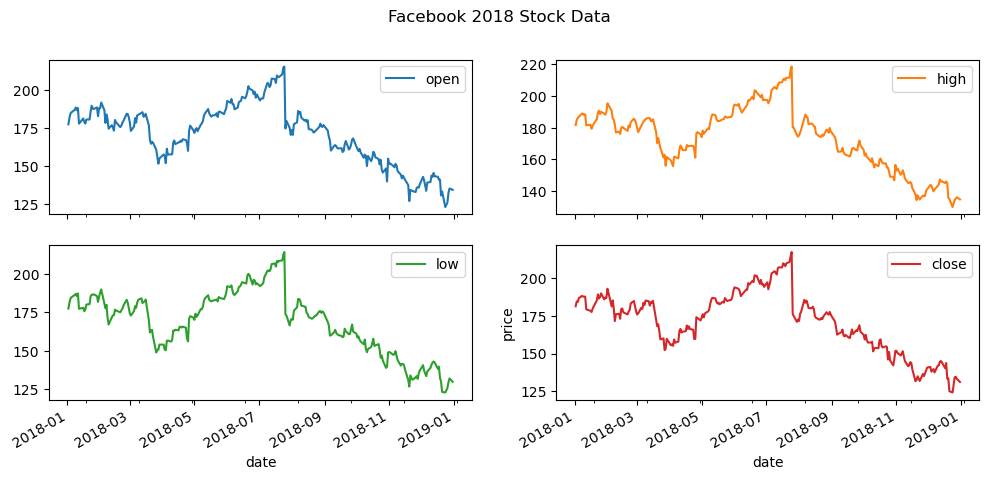

In [199]:
fb.iloc[:, :4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price')
plt.show()


 Simply getting into the habit of using plt.suptitle() instead of plt.title() will save you this
 confusion:

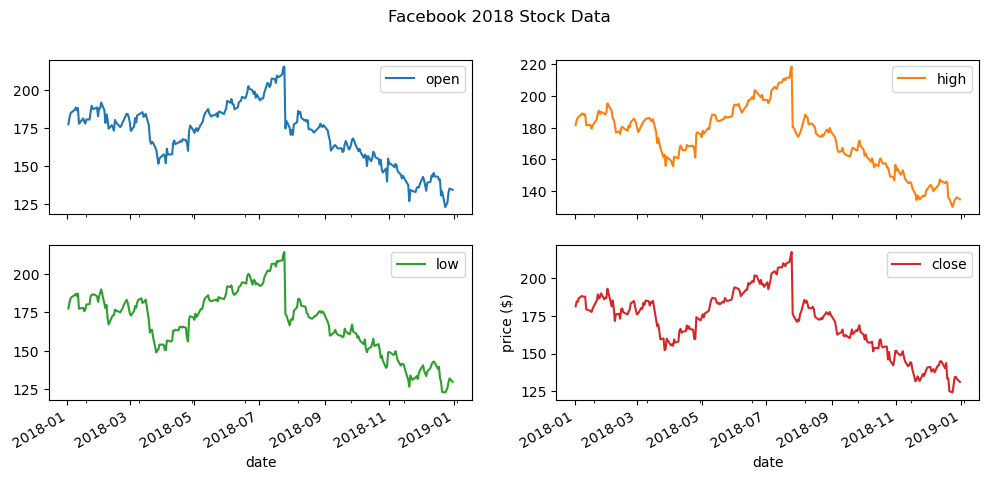

In [202]:
fb.iloc[:, :4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')
plt.show()


#### Legends
 plt.legend() adds a legend to the plot. We can specify where to place it with the loc
 parameter:

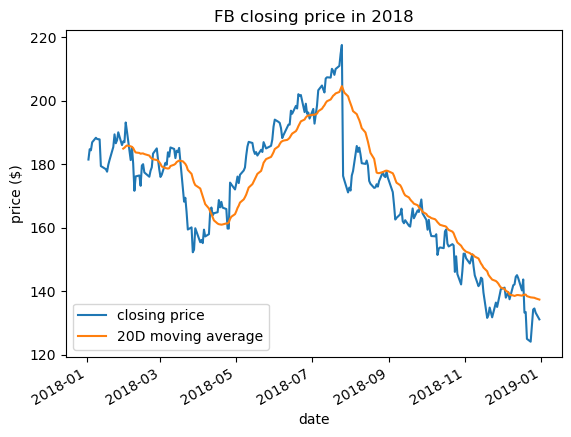

In [205]:
fb.assign(
    ma=lambda x: x.close.rolling(20).mean()
).plot(
    y=['close', 'ma'],
    title='FB closing price in 2018',
    label=['closing price', '20D moving average']
)
plt.legend(loc='lower left')
plt.ylabel('price ($)')
plt.show()


##### Formatting Axes
###### Specifying axis limits
plt.xlim() and plt.ylim() can be used to specify the minimum and maximum values for the axis. Passing None will have matplotlib determine the limit.

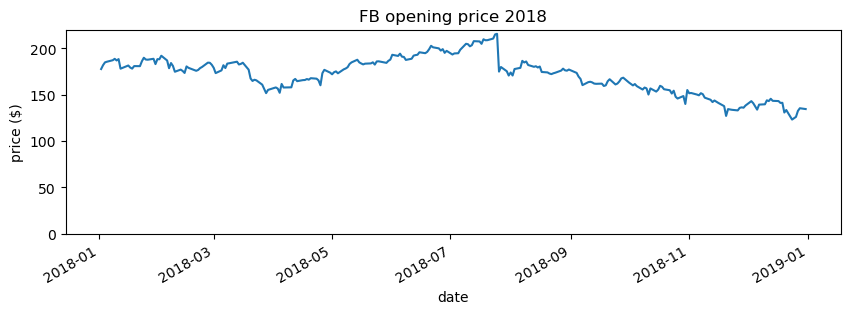

In [209]:

fb.open.plot(figsize=(10, 3), title='FB opening price 2018')
plt.ylim(0, None)
plt.ylabel('price ($)')
plt.show()


####  Formatting the Axis Ticks


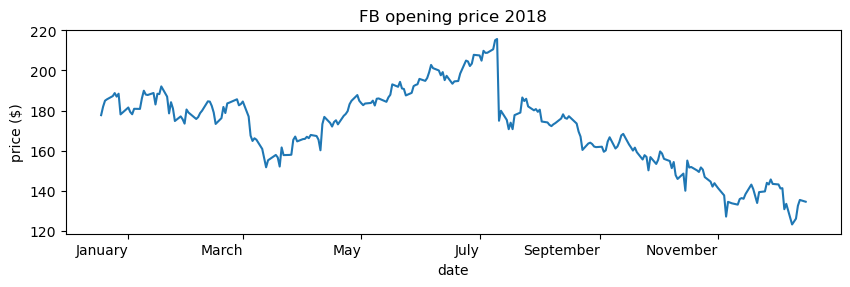

In [212]:
import calendar
fb.open.plot(figsize=(10, 3), rot=0, title='FB opening price 2018')
locs, labels = plt.xticks()
plt.xticks(locs[:6] + 15, calendar.month_name[1::2])
plt.ylabel('price ($)')
plt.show()


#### Using ticker
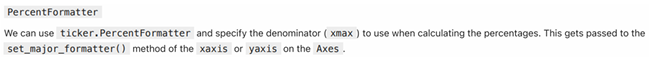

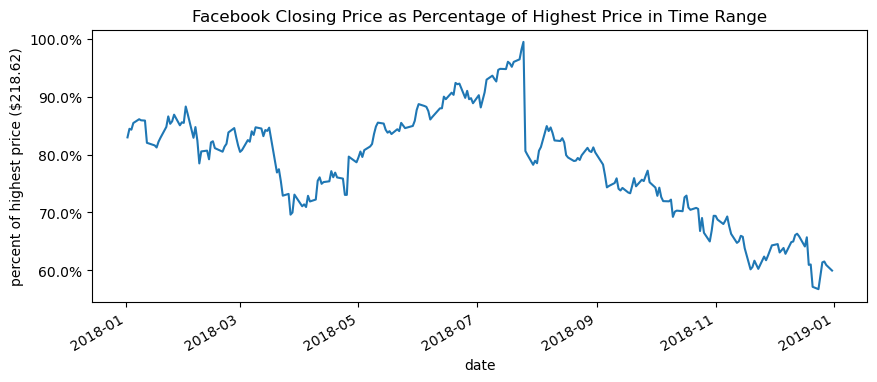

In [215]:
import matplotlib.ticker as ticker
ax = fb.close.plot(
    figsize=(10, 4),
    title='Facebook Closing Price as Percentage of Highest Price in Time Range'
)
ax.yaxis.set_major_formatter(
    ticker.PercentFormatter(xmax=fb.high.max())
)
ax.set_yticks([
    fb.high.max() * pct for pct in np.linspace(0.6, 1, num=5)
])
ax.set_ylabel(f'percent of highest price (${fb.high.max()})')
plt.show()

#### MultipleLocator
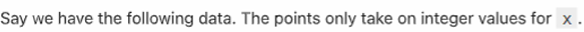

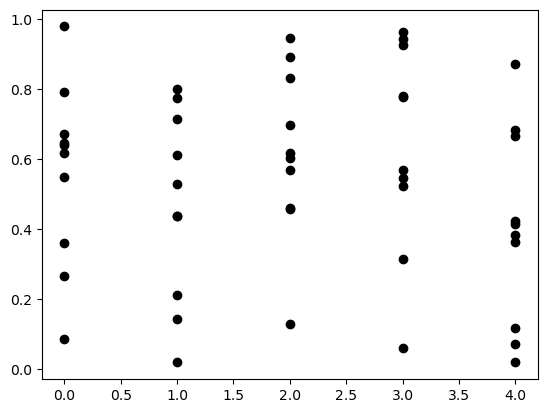

In [218]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
plt.show()


If we don't want to show decimal values on the x-axis, we can use the MultipleLocator . This
 will give ticks for all multiples of a number specified with the base parameter. To get integer
 values, we use base=1 :

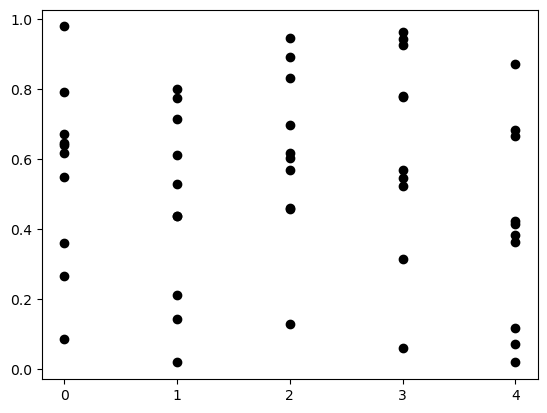

In [221]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
ax.get_xaxis().set_major_locator(ticker.MultipleLocator(base=1))
plt.show()


#### Pandas Plotting Subpackage
## pandas.plotting subpackage
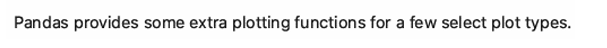
 ###### About the Data
 In this notebook, we will be working with Facebook's stock price throughout 2018 (obtained
 using the stock_analysis package).
 ##### Setup

In [236]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

#### Scatter matrix

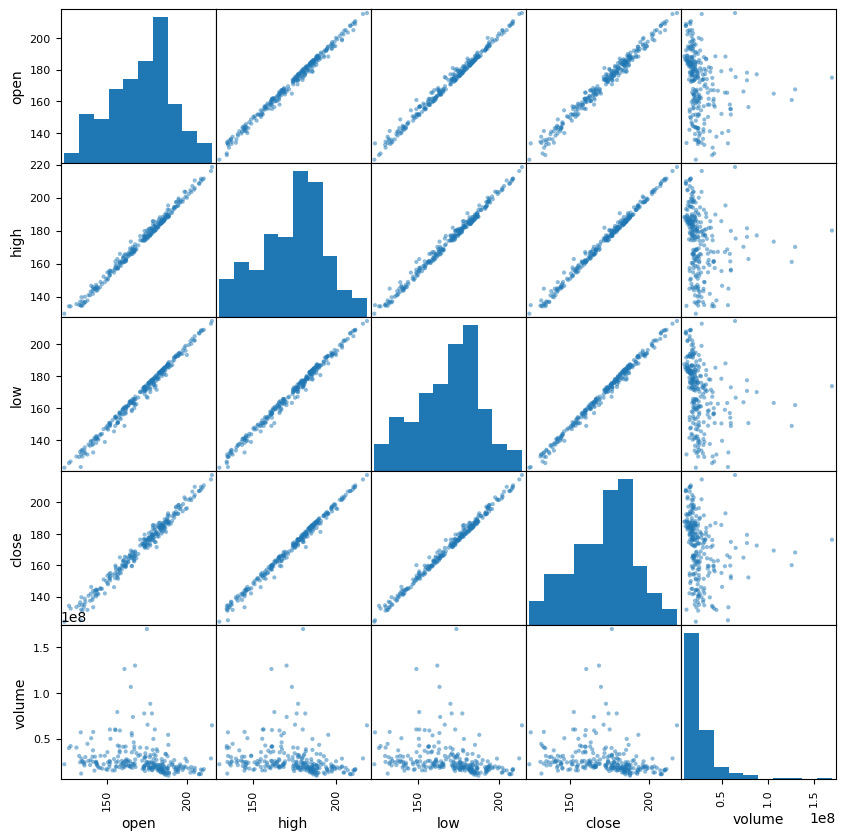

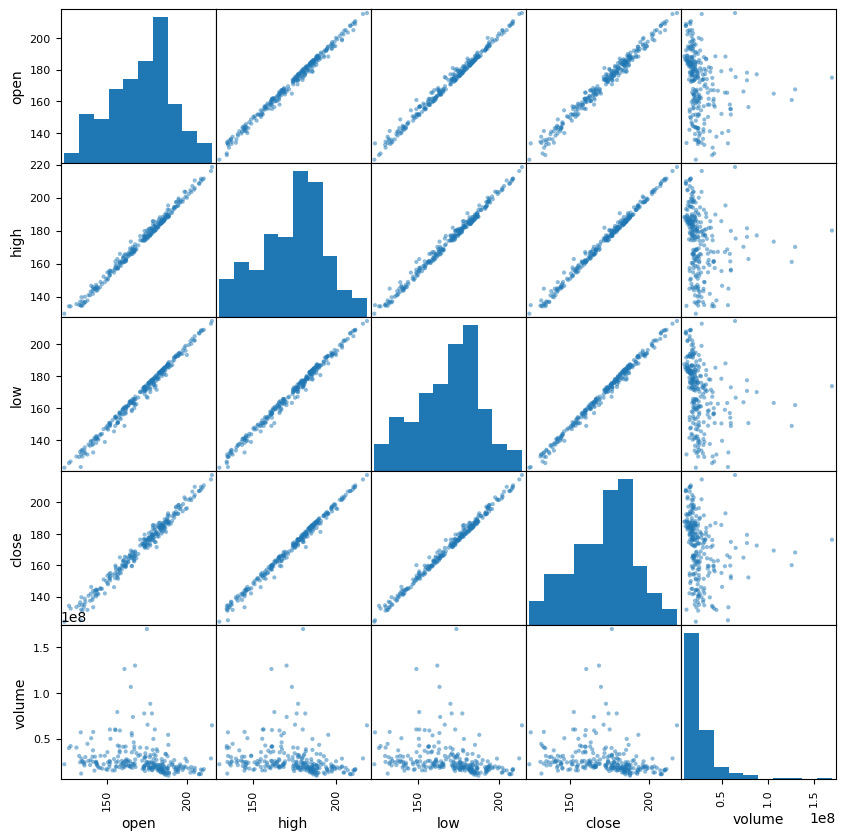

In [234]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))
plt.show()

 Changing the diagonal from histograms to KDE:

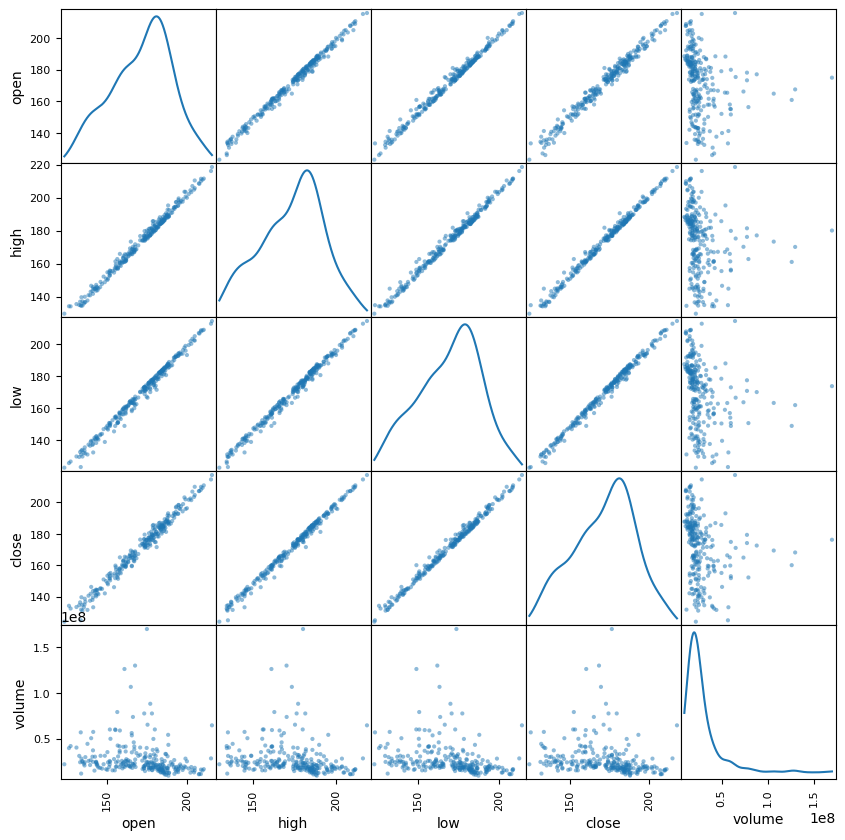

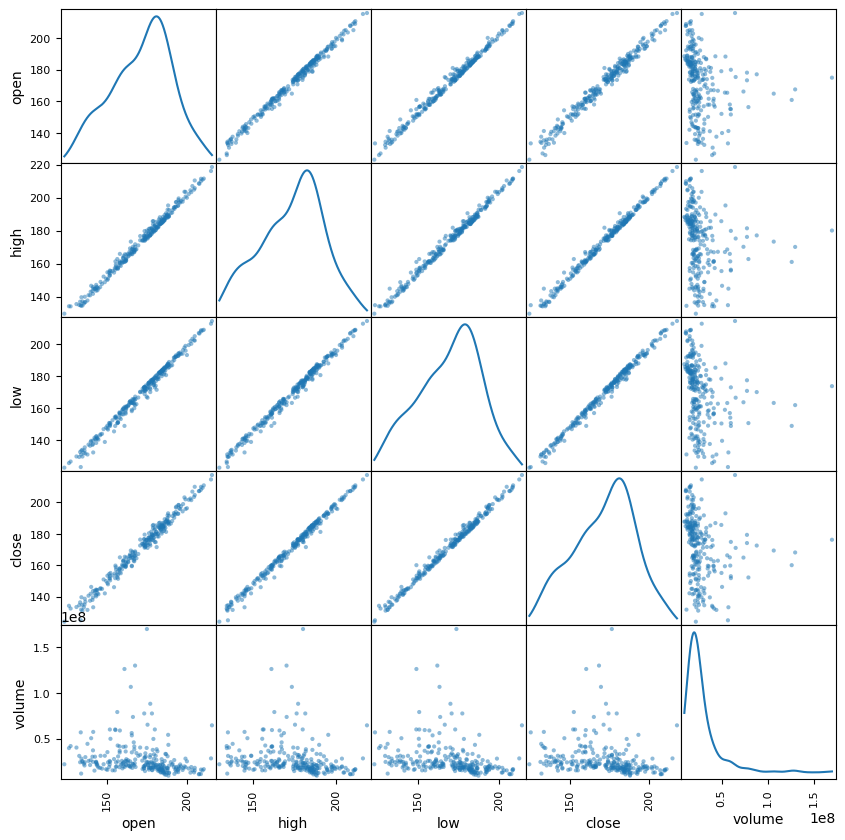

In [241]:
 scatter_matrix(fb, figsize=(10, 10), diagonal='kde')
plt.show()

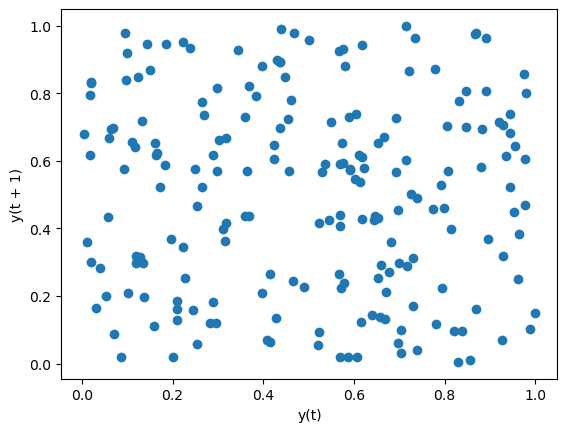

In [247]:
from pandas.plotting import lag_plot
np.random.seed(0) # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))
plt.show()

Data with some level of correlation to itself (autocorrelation) may have patterns. Stock prices
 are highly auto-correlated:

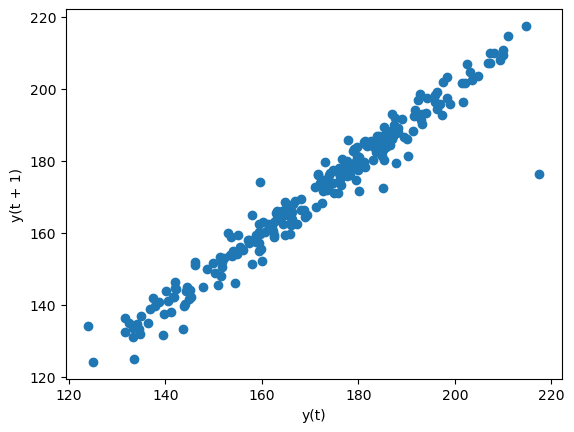

In [250]:
lag_plot(fb.close)
plt.show()

 The default lag is 1, but we can alter this with the lag parameter. Let's look at a 5 day lag (a
 week of trading activity):

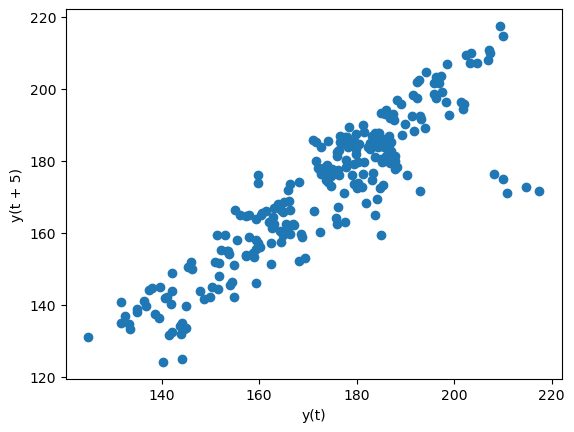

In [253]:
lag_plot(fb.close, lag=5)
plt.show()

#### Autocorrelation plots
 We can use the autocorrelation plot to see if this relationship may be meaningful or just
 noise. Random data will not have any significant autocorrelation (it stays within the bounds
 below):

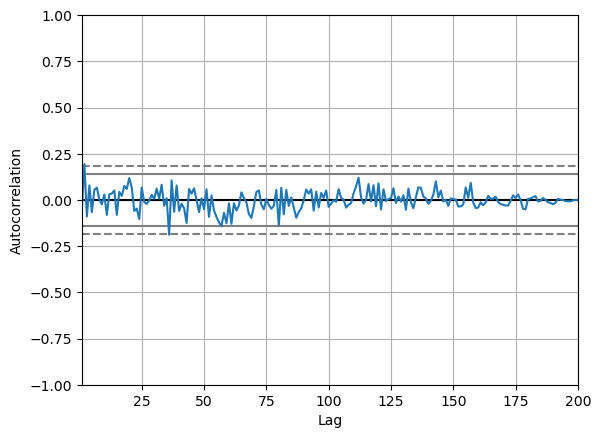

In [256]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0) # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))
plt.show()

 Stock data, on the other hand, does have significant autocorrelation:

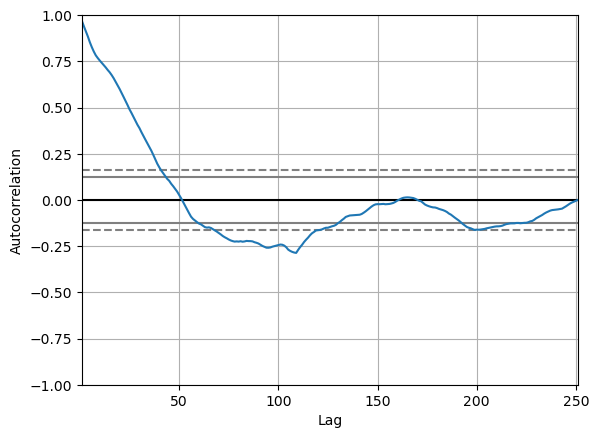

In [259]:
autocorrelation_plot(fb.close)
plt.show()

#### Bootstrap plot
 This plot helps us understand the uncertainty in our summary statistics:

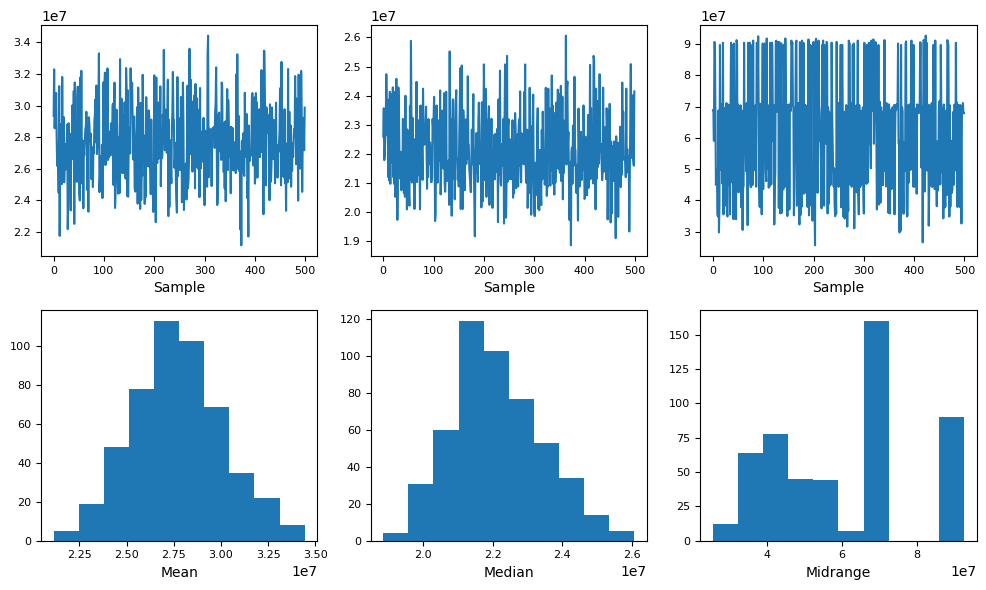

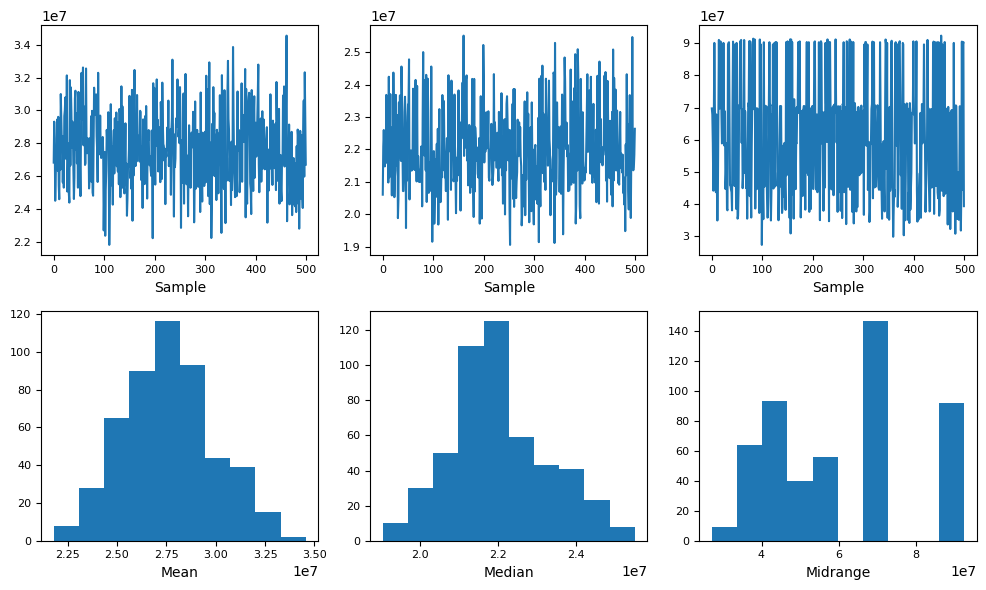

In [264]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))
plt.show()

Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake
 magnitude and whether there was a tsunami with the magType of mb.

### Data Analysis
In this activity, I used Seaborn to visualize earthquake data and Facebook's 2018 stock prices. Tools like strip plots, swarm plots, and heatmaps helped reveal patterns and relationships within the data. Jointplots and pairplots provided insights into variable distribution and correlations, while regression and residual plots highlighted trends and data accuracy. I also explored violin plots, boxen plots, and FacetGrids to compare different groups.

Seaborn is user-friendly and great for quick visualizations, but it offers fewer customization options compared to Matplotlib. Matplotlib, on the other hand, allows for more detailed adjustments like axis labeling, title formatting, and tick control, making it more versatile but also more complex. Both libraries have their strengths depending on the needs of the analysis.

## Supplementary Activity
 Using the CSV files provided and what we have learned so far in this module complete the
 following exercises:

##### Task 1
1. Using seaborn, create a heatmap to visualize the correlation coefficients
 between earthquake magnitude and whether there was a tsunami with
 the magType of mb.

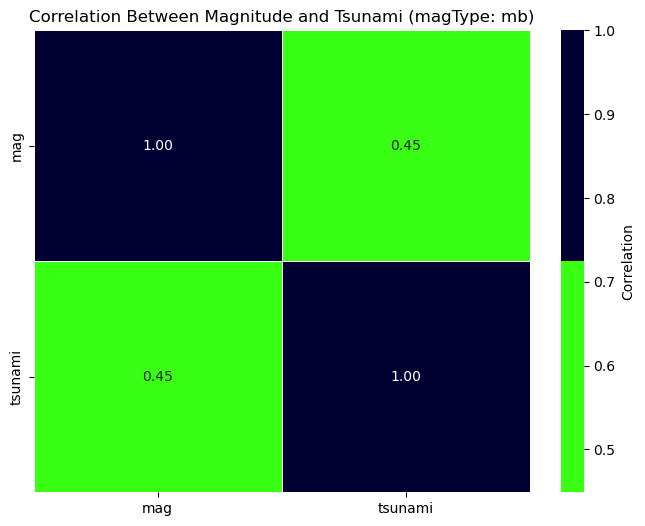

In [283]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('earthquakes-1.csv')

# Filter for 'mb' magnitude type
mb_data = data[data['magType'] == 'mb']

# Calculate correlation of earthquake magnitude and tsunami occurrence
corr_matrix = mb_data[['mag', 'tsunami']].corr()

#colors
custom_palette = ['#39FF14', '#000033']

#set up heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap=sns.color_palette(custom_palette, as_cmap=True),
    fmt='.2f',
    ax=ax,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)

#show
ax.set_title('Correlation Between Magnitude and Tsunami (magType: mb)')
plt.show()


#### Task 2
 2. Create a box plot of Facebook volume traded and closing prices, and
 draw reference lines for the bounds of a Tukey fence with a multiplier of
 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to
use the quantile() method on the data to make this easier. (Pick whichever
 orientation you prefer for the plot, but make sure to use subplots.)

In [295]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fb = pd.read_csv('fb_stock_prices_2018.csv')


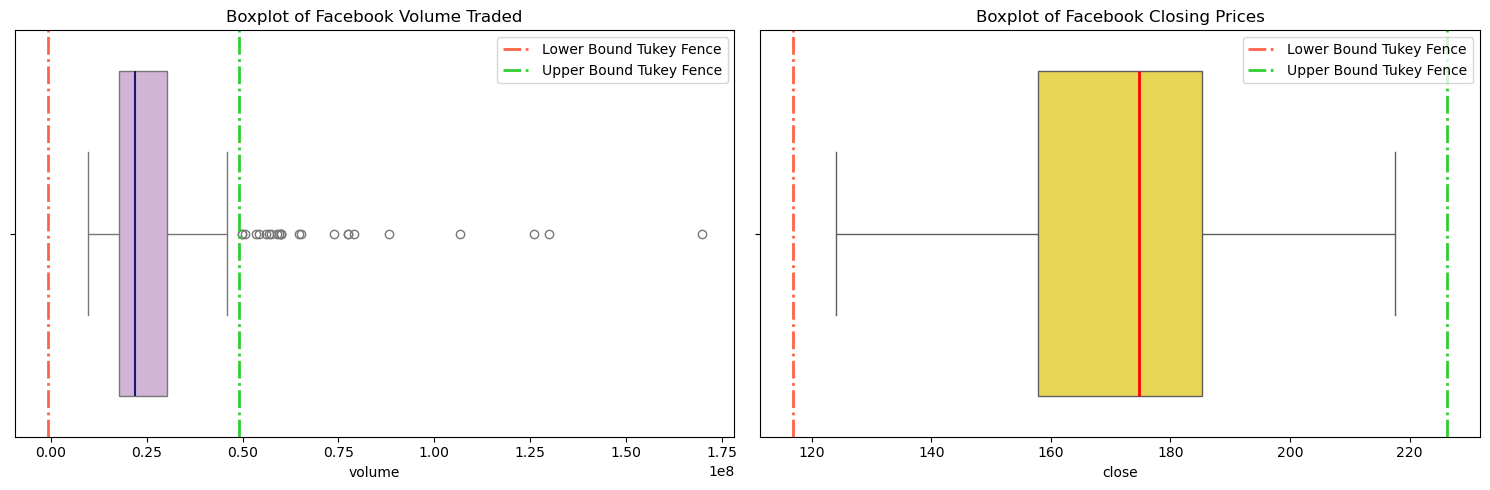

In [368]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fb = pd.read_csv('fb_stock_prices_2018.csv')

# Calculate IQR and Tukey fences for volume and close prices
volume_quartiles = fb['volume'].quantile([0.25, 0.75])
volume_q1, volume_q3 = volume_quartiles.loc[0.25], volume_quartiles.loc[0.75]
volume_iqr = volume_q3 - volume_q1
volume_fence_lower = volume_q1 - 1.5 * volume_iqr
volume_fence_upper = volume_q3 + 1.5 * volume_iqr

close_quartiles = fb['close'].quantile([0.25, 0.75])
close_q1, close_q3 = close_quartiles.loc[0.25], close_quartiles.loc[0.75]
close_iqr = close_q3 - close_q1
close_fence_lower = close_q1 - 1.5 * close_iqr
close_fence_upper = close_q3 + 1.5 * close_iqr

# Create subplots
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

# Volume boxplot (horizontal)
sns.boxplot(x='volume', data=fb, ax=axes[0], color='#D6AEDD', medianprops=dict(color='midnightblue', linewidth=1.5))
axes[0].axvline(x=volume_fence_lower, color='#FF6347', linestyle='-.', linewidth=2, label='Lower Bound Tukey Fence')
axes[0].axvline(x=volume_fence_upper, color='#32CD32', linestyle='-.', linewidth=2, label='Upper Bound Tukey Fence')
axes[0].set_title('Boxplot of Facebook Volume Traded')
axes[0].legend()

# Closing Price boxplot (horizontal)
sns.boxplot(x='close', data=fb, ax=axes[1], color='#FFEB3B', medianprops=dict(color='red', linewidth=2))
axes[1].axvline(x=close_fence_lower, color='#FF6347', linestyle='-.', linewidth=2, label='Lower Bound Tukey Fence')
axes[1].axvline(x=close_fence_upper, color='#32CD32', linestyle='-.', linewidth=2, label='Upper Bound Tukey Fence')
axes[1].set_title('Boxplot of Facebook Closing Prices')
axes[1].legend()

plt.tight_layout()
plt.show()


#### Task 3
 3. Fill in the area between the bounds in the plot from exercise #2.<br>
 A. Modification A: fill the area between the bounds entirely<br>
 Observation: the shading tells that data from the right in subplot of volume,
 are outliers

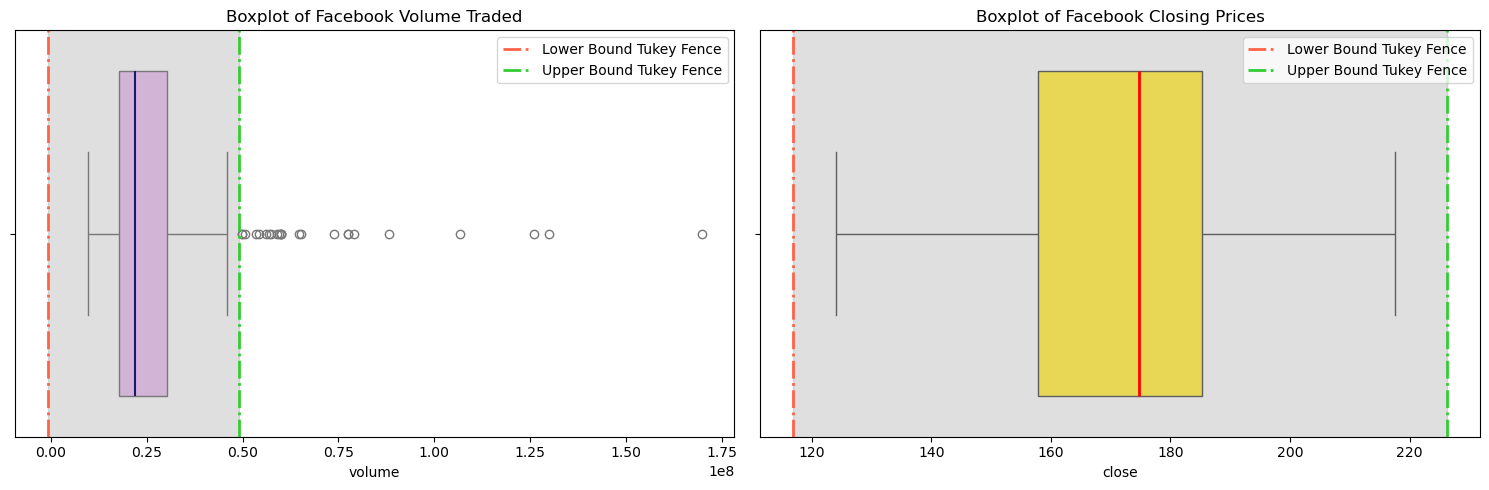

In [366]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
fb = pd.read_csv('fb_stock_prices_2018.csv')

# Calculate IQR and Tukey fences for volume and close prices
volume_quartiles = fb['volume'].quantile([0.25, 0.75])
volume_q1, volume_q3 = volume_quartiles.loc[0.25], volume_quartiles.loc[0.75]
volume_iqr = volume_q3 - volume_q1
volume_fence_lower = volume_q1 - 1.5 * volume_iqr
volume_fence_upper = volume_q3 + 1.5 * volume_iqr

close_quartiles = fb['close'].quantile([0.25, 0.75])
close_q1, close_q3 = close_quartiles.loc[0.25], close_quartiles.loc[0.75]
close_iqr = close_q3 - close_q1
close_fence_lower = close_q1 - 1.5 * close_iqr
close_fence_upper = close_q3 + 1.5 * close_iqr

# Create subplots (two columns)
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

# Volume boxplot (horizontal orientation)
sns.boxplot(x='volume', data=fb, ax=axes[0], color='#D6AEDD', medianprops=dict(color='midnightblue', linewidth=1.5))
axes[0].axvline(x=volume_fence_lower, color='#FF6347', linestyle='-.', linewidth=2, label='Lower Bound Tukey Fence')
axes[0].axvline(x=volume_fence_upper, color='#32CD32', linestyle='-.', linewidth=2, label='Upper Bound Tukey Fence')
axes[0].axvspan(volume_fence_lower, volume_fence_upper, color='gray', alpha=0.25)
axes[0].set_title('Boxplot of Facebook Volume Traded')
axes[0].legend()

# Closing Price boxplot (horizontal orientation)
sns.boxplot(x='close', data=fb, ax=axes[1], color='#FFEB3B', medianprops=dict(color='red', linewidth=2))
axes[1].axvline(x=close_fence_lower, color='#FF6347', linestyle='-.', linewidth=2, label='Lower Bound Tukey Fence')
axes[1].axvline(x=close_fence_upper, color='#32CD32', linestyle='-.', linewidth=2, label='Upper Bound Tukey Fence')
axes[1].axvspan(close_fence_lower, close_fence_upper, color='gray', alpha=0.25)
axes[1].set_title('Boxplot of Facebook Closing Prices')
axes[1].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


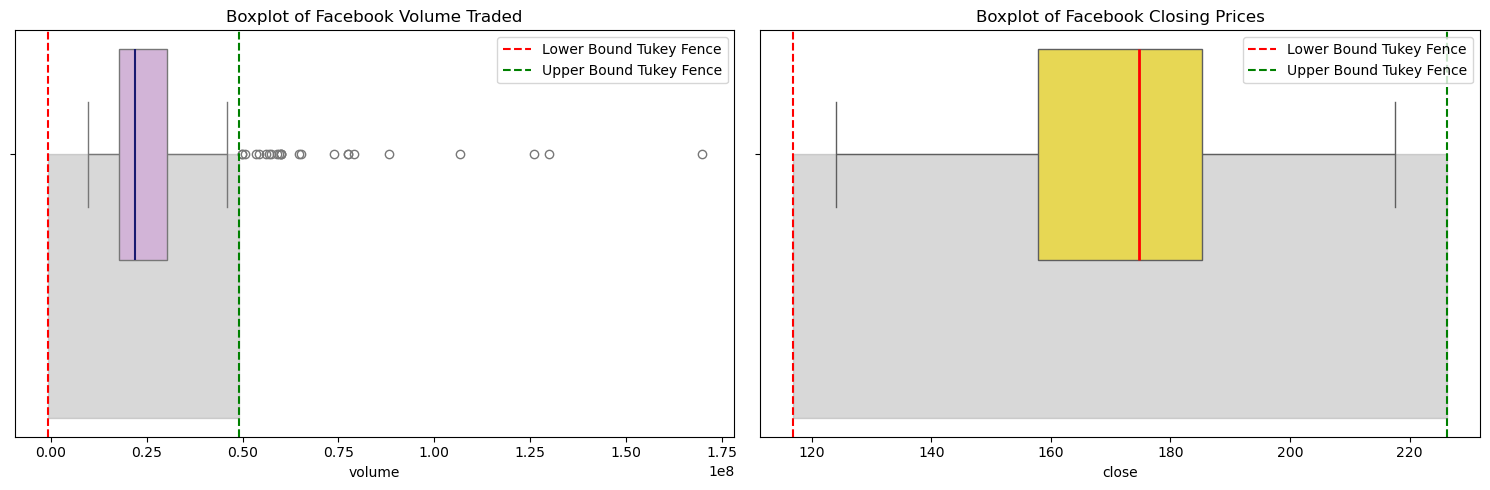

In [406]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

# Volume boxplot
sns.boxplot(
    x='volume',
    data=fb, 
    ax=axes[0],
    color='#D6AEDD',  
    medianprops=dict(color='midnightblue', linewidth=1.5)
)
axes[0].axvline(
    x=volume_fence_lower,
    color='red',
    linestyle='--',
    label='Lower Bound Tukey Fence'
)
axes[0].axvline(
    x=volume_fence_upper,
    color='green',
    linestyle='--',
    label='Upper Bound Tukey Fence'
)

# Fill between bounds
axes[0].fill_betweenx([0, 1], 
                      volume_fence_lower, 
                      volume_fence_upper, 
                      color='gray', 
                      alpha=0.3)

axes[0].set_title('Boxplot of Facebook Volume Traded')
axes[0].legend()

# Closing price boxplot
sns.boxplot(
    x='close',
    data=fb,
    ax=axes[1],
    color='#FFEB3B',  
    medianprops=dict(color='red', linewidth=2)
)
axes[1].axvline(
    x=close_fence_lower,
    color='red',
    linestyle='--',
    label='Lower Bound Tukey Fence'
)
axes[1].axvline(
    x=close_fence_upper,
    color='green',
    linestyle='--',
    label='Upper Bound Tukey Fence'
)

# Fill between bounds
axes[1].fill_betweenx([0, 1],
                      close_fence_lower,
                      close_fence_upper,
                      color='gray',
                      alpha=0.3)

axes[1].set_title('Boxplot of Facebook Closing Prices')
axes[1].legend()

plt.tight_layout()
plt.show()


#### Task 4
 4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31',
 which marks the large decline in Facebook price on a line plot of the
 closing price

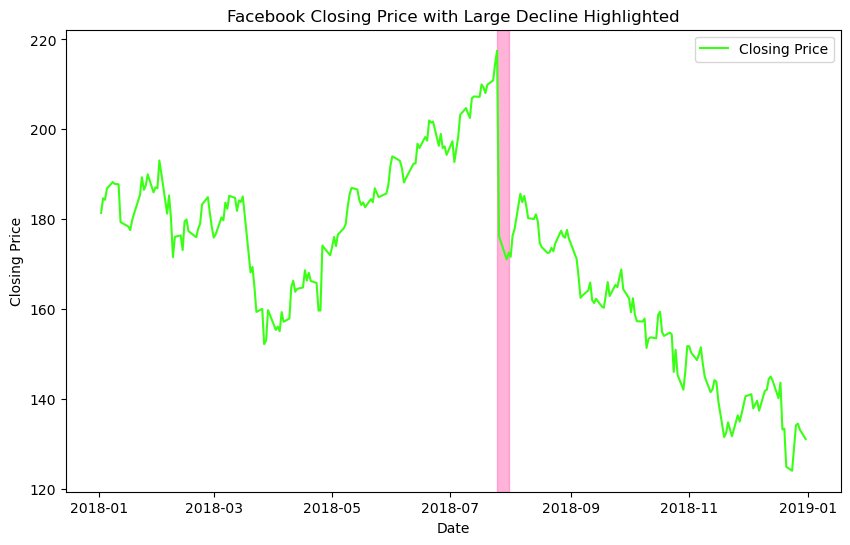

In [419]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fb_data = pd.read_csv('fb_stock_prices_2018.csv')

fb_data['date'] = pd.to_datetime(fb_data['date'])
fb_data.set_index('date', inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot closing price 
ax.plot(fb_data.index, fb_data['close'], label='Closing Price', color='#39FF14')  
# Highlight decline period
ax.axvspan(pd.to_datetime('2018-07-25'), pd.to_datetime('2018-07-31'), color='#FF69B4', alpha=0.5)  # Barbie Pink

ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.set_title('Facebook Closing Price with Large Decline Highlighted')

ax.legend()

plt.show()


#### Task 5
 5. Using the Facebook stock price data, annotate the following three events
 on a line plot of the closing price:<br>
*  Disappointing user growth announced after close on July 25, 2018
* Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
* FTC launches investigation on March 20, 2018

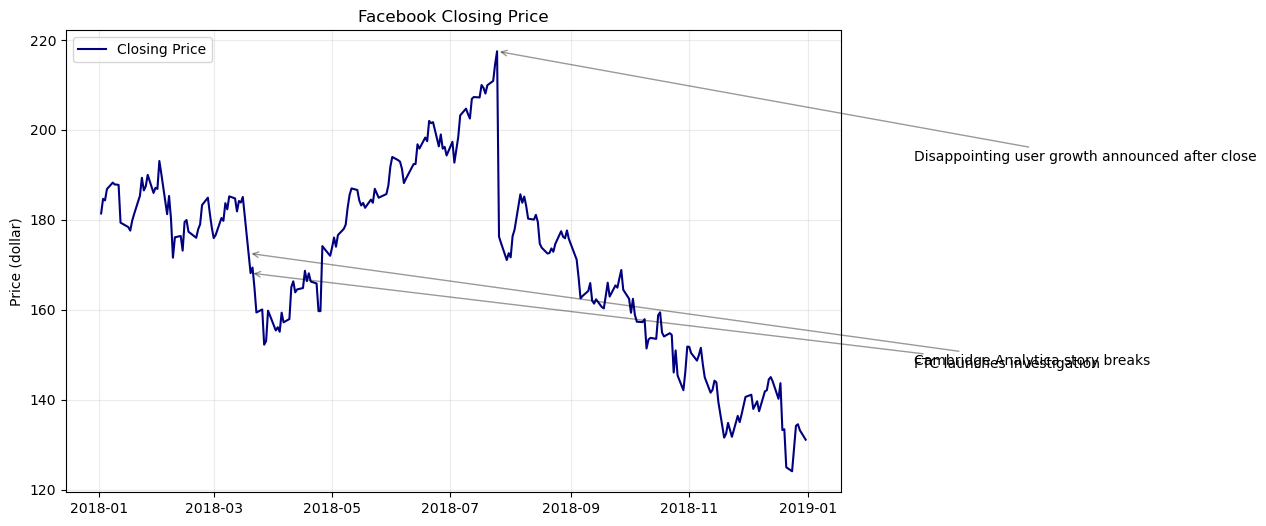

In [428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fb = pd.read_csv('fb_stock_prices_2018.csv', parse_dates=['date'], index_col='date')

events = [
    ('Disappointing user growth announced after close', '2018-07-25'),
    ('Cambridge Analytica story breaks', '2018-03-19'),
    ('FTC launches investigation', '2018-03-20')
]

fig, ax = plt.subplots(figsize=(10, 6))

# Plot closing price
ax.plot(fb.index, fb['close'], label='Closing Price', color='#000080')  

for event, date in events:
    ax.annotate(event, xy=(pd.to_datetime(date), fb.loc[date, 'close']),
                xytext=(pd.to_datetime('2019-02-25'), fb.loc[date, 'close'] + np.random.uniform(-20, -25)),
                arrowprops=dict(arrowstyle='->', alpha=0.4))

ax.grid(True, alpha=0.25)
ax.set_ylabel('Price (dollar)')
ax.set_title('Facebook Closing Price')
ax.legend()

plt.show()


C:\Users\Kristel\AppData\Local\Temp\ipykernel_31204\329169456.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('tab10', permutation_count)  # Qualitative colormap


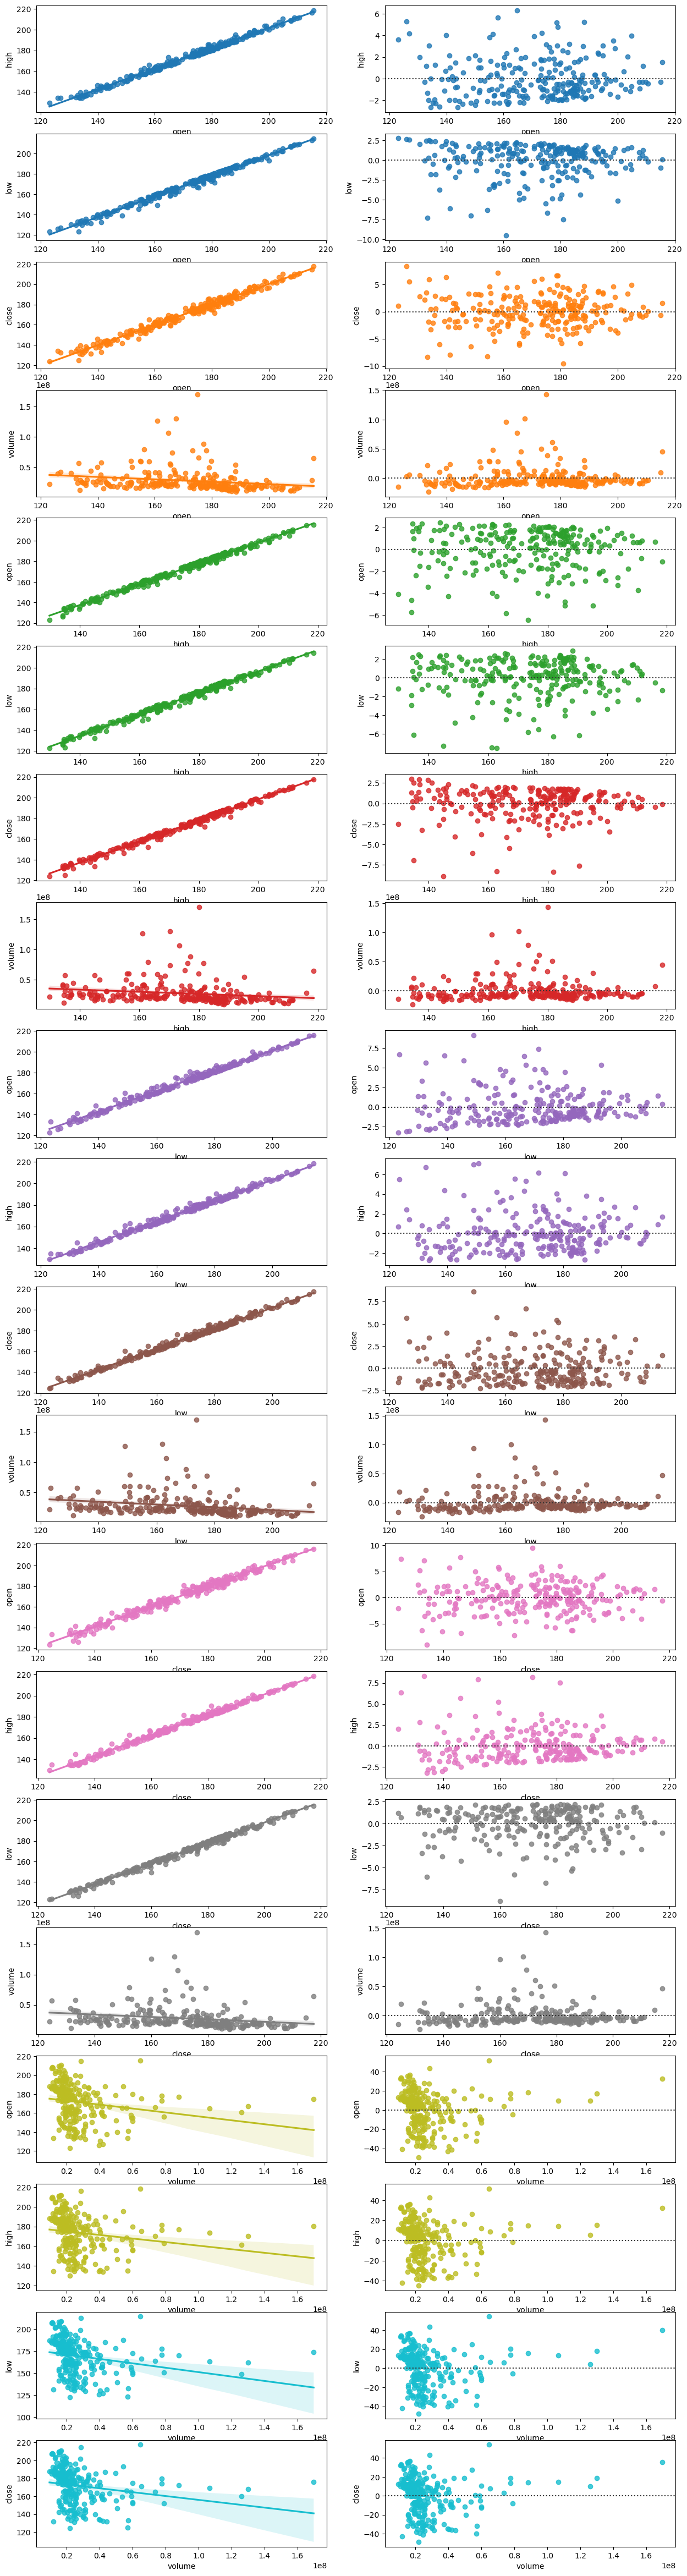

In [430]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

def reg_resid_plots(data):
    num_cols = data.shape[1]
    colormap = cm.get_cmap('tab10', num_cols * (num_cols - 1))  
    colors = [colormap(i) for i in range(num_cols * (num_cols - 1))]
    
    fig, ax = plt.subplots(num_cols * (num_cols - 1), 2, figsize=(15, 60))
    
    for i, ((x, y), axes) in enumerate(zip(itertools.permutations(data.columns, 2), ax)):
        color = colors[i]
        for j, func in enumerate([sns.regplot, sns.residplot]):
            func(x=x, y=y, data=data, ax=axes[j], color=color)
    
    plt.close()
    return fig


reg_resid_plots(fb)
